***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
data = pd.read_csv('data.csv')

### Visualize o conteúdo do DataFrame

In [3]:
data

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
data.Renda.max()

200000

In [5]:
inter_classes = [data.Renda.min(), 2 * 788, 5 * 788, 15 * 788, 25 * 788, data.Renda.max()]

### 2º Definir os labels das classes

In [6]:
label_classes = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [7]:
frequency = pd.value_counts(
    pd.cut(x = data.Renda,
           bins = inter_classes, labels = label_classes,
           include_lowest = True  
    )
)
frequency

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [8]:
percentage = pd.value_counts(
    pd.cut(x = data.Renda,
           bins = inter_classes, labels = label_classes,
           include_lowest = True),
    normalize = True
) * 100
percentage

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [9]:
frequencies = pd.DataFrame({'Frequency' : frequency, 'Percentage %' : percentage}).sort_index(ascending = False)
frequencies

,Frequency,Percentage %
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

In [10]:
frequencies.Frequency

A      420
B      822
C     7241
D    18602
E    49755
Name: Frequency, dtype: int64

<AxesSubplot: >

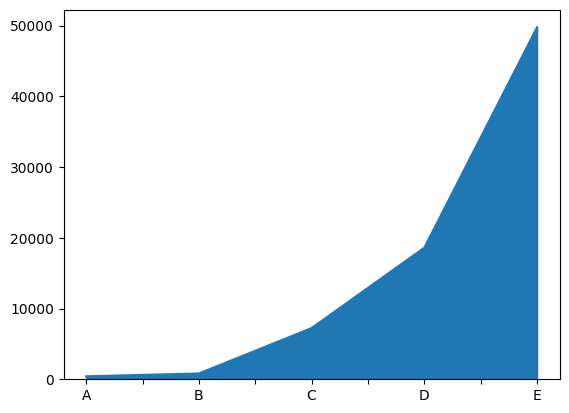

In [11]:
frequencies.Frequency.plot.area()

> ### Conclusões

Escreva suas conclusões aqui...

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

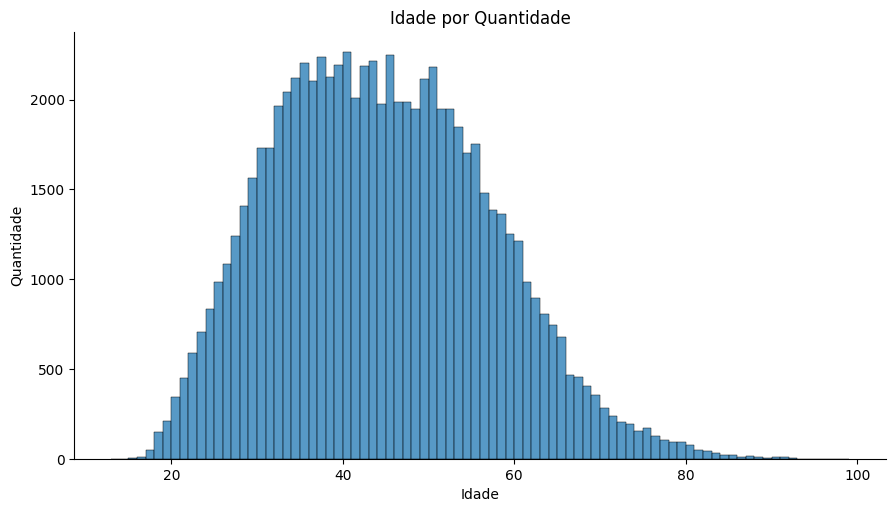

In [12]:
ax = sns.displot(data['Idade'], bins = 86)
ax.figure.set_size_inches(10, 5)
ax.set(title = 'Idade por Quantidade', xlabel = 'Idade', ylabel = 'Quantidade')

ax;

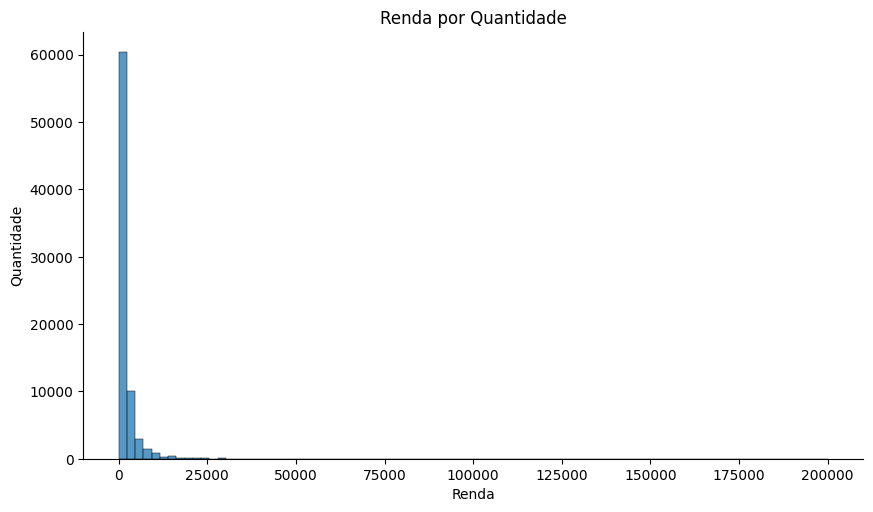

In [13]:
ax = sns.displot(data.Renda, bins = 86)

ax.figure.set_size_inches(10, 5)
ax.set(title = 'Renda por Quantidade', xlabel = 'Renda', ylabel = 'Quantidade')

ax;

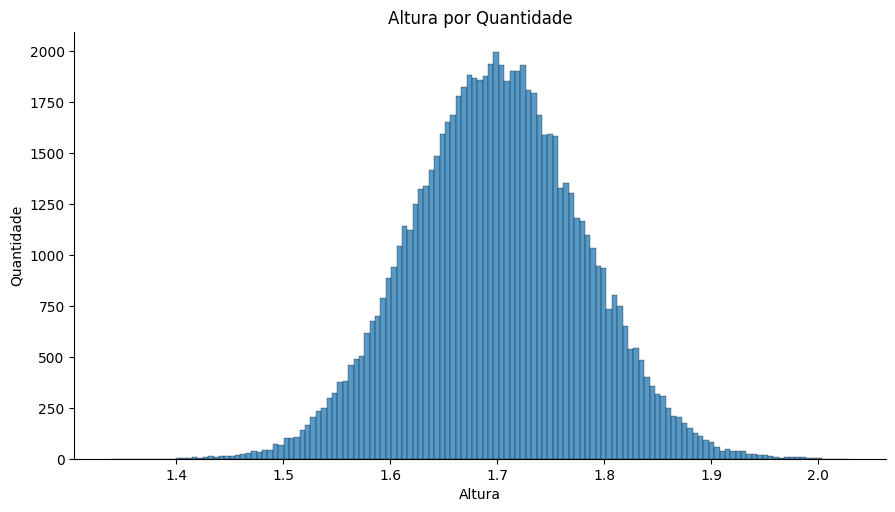

In [14]:
ax = sns.displot(data['Altura'])

ax.figure.set_size_inches(10, 5)
ax.set(title = 'Altura por Quantidade', xlabel = 'Altura', ylabel = 'Quantidade')

ax;

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

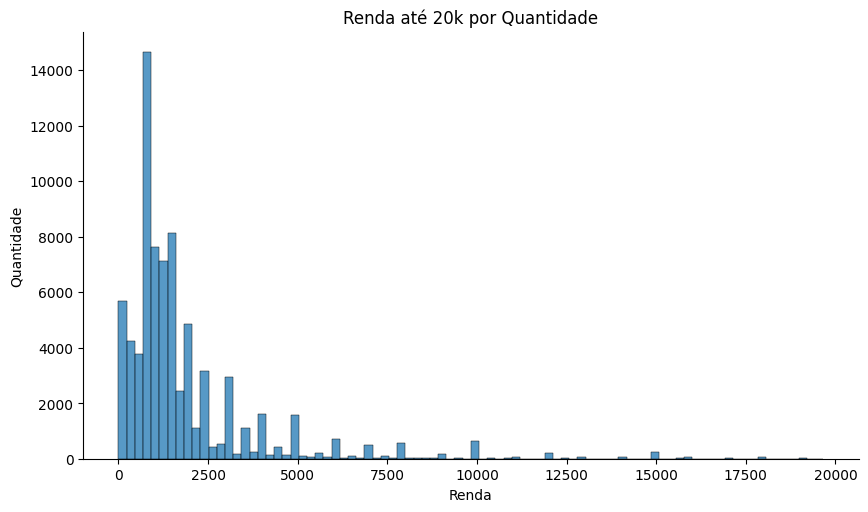

In [15]:
ax = sns.displot(data.query('Renda < 20000')['Renda'], bins = 86)

ax.figure.set_size_inches(10, 5)
ax.set(title = 'Renda até 20k por Quantidade', ylabel = 'Quantidade')

ax;

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [16]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [17]:
frequency = pd.crosstab(data.Sexo, data.Cor)
frequency = frequency.rename(index = sexo, columns = cor)
frequency

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [18]:
percentage = (pd.crosstab(data.Sexo, data.Cor,
                         normalize = True) * 100).round(2)
percentage = percentage.rename(index = sexo, columns = cor)
percentage

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [19]:
data.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [20]:
data.Renda.median()

1200.0

### Obtenha a moda

In [21]:
data.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [22]:
data.Renda.mad()

C:\Users\mhenr\AppData\Local\Temp\ipykernel_12644\3374860638.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  data.Renda.mad()


1526.4951371638058

### Obtenha a variância

In [23]:
data.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [24]:
data.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [25]:
estatic = pd.crosstab(data.Cor, data.Sexo,
                      values = data.Renda, aggfunc = ('mean', 'median', 'max'))
estatic

max                 mean               median        
Sexo       0       1            0            1       0       1
Cor                                                           
0      10000  120000  1081.710938  2464.386139   797.5   788.0
2     200000  100000  2925.744435  2109.866750  1700.0  1200.0
4      50000   23000  1603.861687  1134.596400  1200.0   800.0
6      50000   20000  4758.251064  3027.341880  2800.0  1500.0
8     100000   30000  1659.577425  1176.758516  1200.0   800.0

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [26]:
estatic_2 = pd.crosstab(data.Cor, data.Sexo,
                        values = data.Renda.round(2), aggfunc = {'mad', 'var', 'std'})
estatic_2

C:\Users\mhenr\AppData\Local\Temp\ipykernel_12644\1530516759.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  estatic_2 = pd.crosstab(data.Cor, data.Sexo,
C:\Users\mhenr\AppData\Local\Temp\ipykernel_12644\1530516759.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  estatic_2 = pd.crosstab(data.Cor, data.Sexo,
C:\Users\mhenr\AppData\Local\Temp\ipykernel_12644\1530516759.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  estatic_2 = pd.crosstab(data.Cor, data.Sexo,
C:\Users\mhenr\AppData\Local\Temp\ipykernel_12644\1530516759.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result,

mad                       std                         var  \
Sexo            0            1            0             1             0   
Cor                                                                       
0      798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
2     2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
4      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
6     3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
8     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                    
Sexo             1  
Cor                 
0     1.429818e+08  
2     1.056909e+07  
4     1.821960e+06  
6     1.392166e+07  
8     2.547960e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

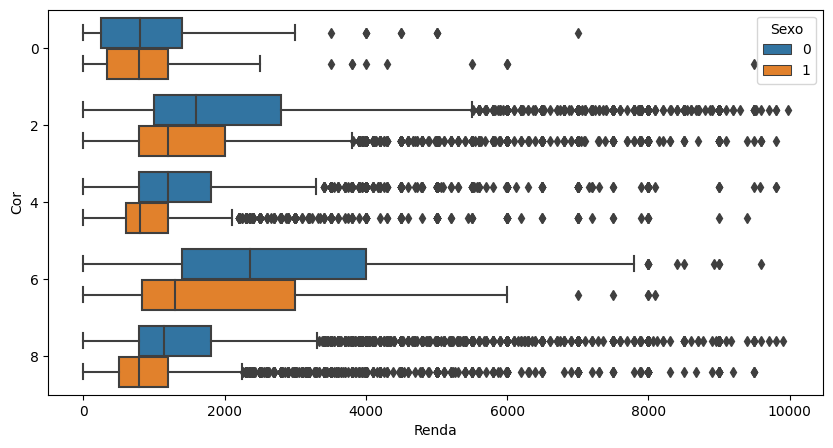

In [30]:
ax = sns.boxplot(data = data.query('Renda < 10000'),
                 x = 'Renda', y = 'Cor', hue = 'Sexo', orient = 'h')

ax.figure.set_size_inches(10, 5)

ax;

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [27]:
from scipy import stats

percentage = stats.percentileofscore(data.Renda, 788, kind = 'weak')
percentage

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [31]:
value = data.Renda.quantile(0.99)
value

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [33]:
estatic_3 = pd.crosstab(data['Anos de Estudo'], data.Sexo,
                        values = data.Renda, aggfunc = {'mean', 'median', 'max', 'std'})
estatic_3

max                 mean               median          \
Sexo                 0       1            0            1       0       1   
Anos de Estudo                                                             
1                30000   10000   799.494638   516.201748   700.0   390.0   
2                30000    2000   895.629047   492.771987   788.0   400.0   
3                40000    4000   931.178986   529.911638   788.0   450.0   
4                80000    3500  1109.203862   546.853916   800.0   500.0   
5                50000   10000  1302.329283   704.279111  1000.0   788.0   
6                35000    8000  1338.653218   781.389776  1045.0   788.0   
7                25000    6000  1448.875419   833.732824  1200.0   788.0   
8                40000    9000  1465.497940   830.751004  1200.0   788.0   
9                30000   18000  1639.396667   933.615351  1300.0   800.0   
10               60000   20000  1508.038850   868.021700  1200.0   788.0   
11               45000    6000  1731.270847   925.919225  1218.0   800.0   
12              200000  100000  2117.060504  1286.790889  1500.0  1000.0   
13               30000  120000  2470.330776  1682.313725  1800.0  1200.0   
14               25000   20000  3195.099154  1911.730047  2400.0  1300.0   
15               50000   20000  3706.620269  2226.460457  2500.0  1600.0   
16              200000  100000  6134.279790  3899.513231  4000.0  2800.0   
17                7000    3000  1295.761905   798.174419  1200.0   788.0   

                        std               
Sexo                      0            1  
Anos de Estudo                            
1               1023.904884   639.311534  
2               1331.950552   425.291842  
3               1435.173827   498.234168  
4               2143.800133   424.124446  
5               1419.821787   629.553397  
6               1484.650587   635.782641  
7               1476.628602   574.547028  
8               1419.708673   602.038029  
9               1515.583715   896.781213  
10              2137.664774   973.221652  
11              2078.609734   620.611907  
12              2676.538942  1819.040417  
13              2268.081538  4851.833513  
14              2797.116800  2053.789771  
15              3987.214974  2064.083336  
16              7447.613594  4212.770709  
17               979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

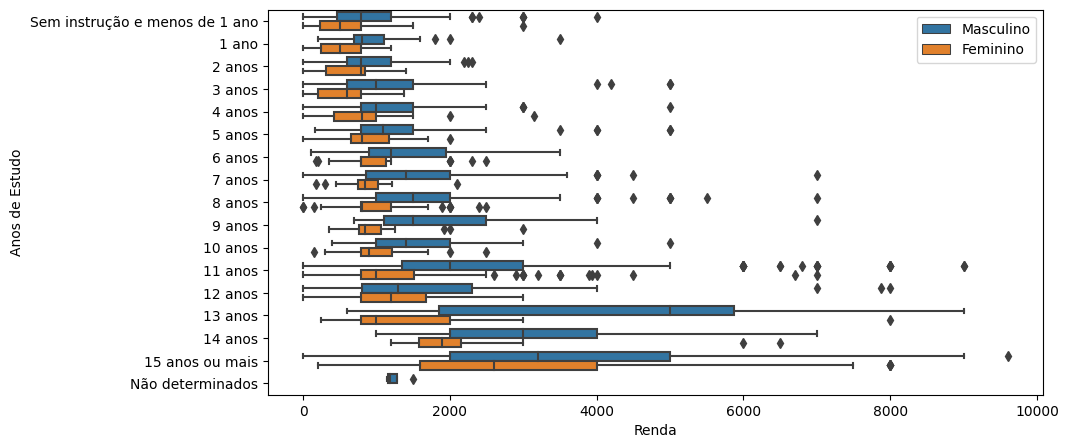

In [38]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo',
                 data = data.query('Renda < 10000 and Idade == 50'), orient = 'h')

ax.figure.set_size_inches(10, 5)
ax.set_yticklabels([key for key in anos_de_estudo.values()])

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'])

ax;

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [39]:
estatic_4 = data.groupby(['UF']).agg({'Renda' : {'mean', 'median', 'max', 'std'}})
estatic_4

Renda                                  
       max          std  median         mean
UF                                          
11   50000  2406.161161  1200.0  1789.761223
12   30000  2276.233415   900.0  1506.091782
13   22000  1757.935591   900.0  1445.130100
14   20000  2079.659238  1000.0  1783.588889
15   50000  2053.779555   850.0  1399.076871
16   15580  2020.688632  1200.0  1861.353516
17   60000  2934.590741  1000.0  1771.094946
21   30000  1887.816905   700.0  1019.432009
22   40000  2373.355726   750.0  1074.550784
23   25000  1821.963536   789.0  1255.403692
24   15500  1651.805500   800.0  1344.721480
25   30000  1950.272431   788.0  1293.370487
26   50000  2389.622497   900.0  1527.079319
27   11000  1237.856197   788.0  1144.552602
28   16000  1478.997878   788.0  1109.111111
29  200000  3507.917248   800.0  1429.645094
31  100000  3584.721547  1200.0  2056.432084
32  100000  3513.846868  1274.0  2026.383852
33  200000  5214.583518  1400.0  2496.403168
35   80000  3503.777366  1600.0  2638.104986
41  200000  4302.937995  1500.0  2493.870753
42   80000  3137.651112  1800.0  2470.854945
43   35000  2913.335783  1500.0  2315.158336
50   42000  3031.419122  1500.0  2262.604167
51   35000  2542.630178  1500.0  2130.652778
52   30000  2221.933065  1500.0  1994.580794
53  100000  5550.463338  2000.0  4241.954722

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

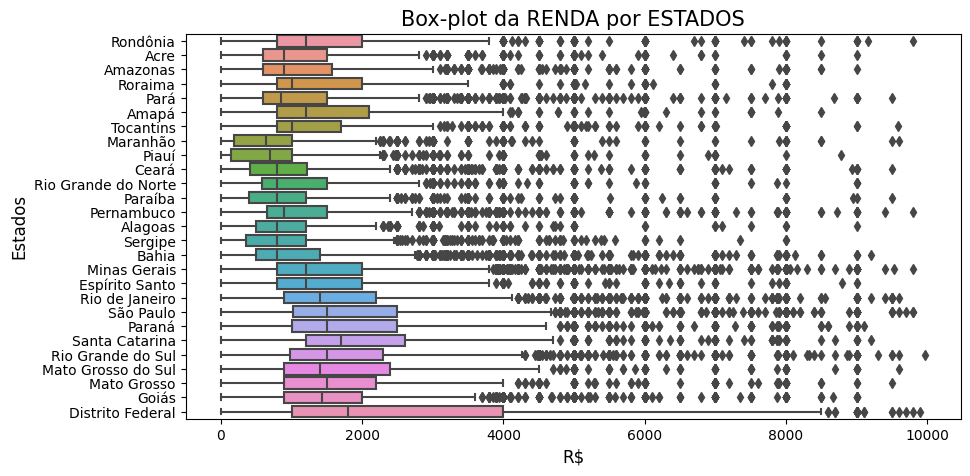

In [45]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = data.query('Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(10, 5)

ax.set_title('Box-plot da RENDA por ESTADOS', fontsize = 15)
ax.set_xlabel('R$', fontsize = 12)
ax.set_ylabel('Estados', fontsize = 12)

ax.set_yticklabels(key for key in uf.values())

ax;

> ### Conclusões

Escreva suas conclusões aqui...